# Multiple Linear Regression Model for the Prediction of demand for Shared Bikes

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands

# Data Preperation

**Read Me**

*-instant: record index*

*-dteday : date*

*-season : season (1:spring, 2:summer, 3:fall, 4:winter)*

*-yr : year (0: 2018, 1:2019)*

*-mnth : month ( 1 to 12)*

*-holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)*

*-weekday : day of the week*

*-workingday : if day is neither weekend nor holiday is 1, otherwise is 0.*

*+ weathersit :* 

*1: Clear, Few clouds, Partly cloudy, Partly cloudy*

*- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist*

*- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds*

*- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog*

*- temp : temperature in Celsius*

*- atemp: feeling temperature in Celsius*

*- hum: humidity*

*- windspeed: wind speed*

*- casual: count of casual users*

*- registered: count of registered users*

*- cnt: count of total rental bikes including both casual and registered*

In [71]:
import pandas as pd

In [72]:
# read csv file
df = pd.read_csv('day.csv')

In [73]:
# check the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


*Mapping values for better understanding*

In [74]:
df['season'] = df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['mnth'] = df['mnth'].replace({1: 'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})
df['weekday']=df['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
df['weathersit'] = df['weathersit'].replace({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [75]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,Saturday,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,Sunday,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [76]:
# checking null values
df.isna().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [77]:
# checking info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [78]:
# checking for duplicate data
df.duplicated().sum()

0

*No null/missing values in the dataset.*
*No duplicates data present.*

* Dropping unnecessary columns

In [79]:
# checking present columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

*Dropping columns*
* instant: record index
* dteday: date
* casual: count of casual users
* registered: count of registered users

*Reason: Index is just 1,2,3,....730. We have year and month columns. We have total count 'cnt'* 

In [80]:
df = df.drop(columns=['instant', 'dteday','casual', 'registered'])

In [81]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Saturday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [82]:
df = pd.get_dummies(df, columns=['season','mnth','weekday','weathersit'],drop_first=True)

In [83]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [84]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [85]:
for col in df.columns:
    if 'season_' in col or 'mnth_' in col or 'weekday_' in col or 'weathersit_' in col:
        df[col] = df[col].astype(int)

In [86]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   season_spring      730 non-null    int32  
 9   season_summer      730 non-null    int32  
 10  season_winter      730 non-null    int32  
 11  mnth_aug           730 non-null    int32  
 12  mnth_dec           730 non-null    int32  
 13  mnth_feb           730 non-null    int32  
 14  mnth_jan           730 non-null    int32  
 15  mnth_july          730 non-null    int32  
 16  mnth_june          730 non

In [88]:
df.shape

(730, 30)

*Data is ready for exploration.*

-------------------------------------------------

# Exploratory Data Analysis

* split the data in train & test data set
* exploring the training dataset & will keep the test for testing the accracy of the model

In [89]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df_train, df_test = train_test_split(df, train_size=0.70, test_size=0.30, random_state=44) 
# created train & test dataset

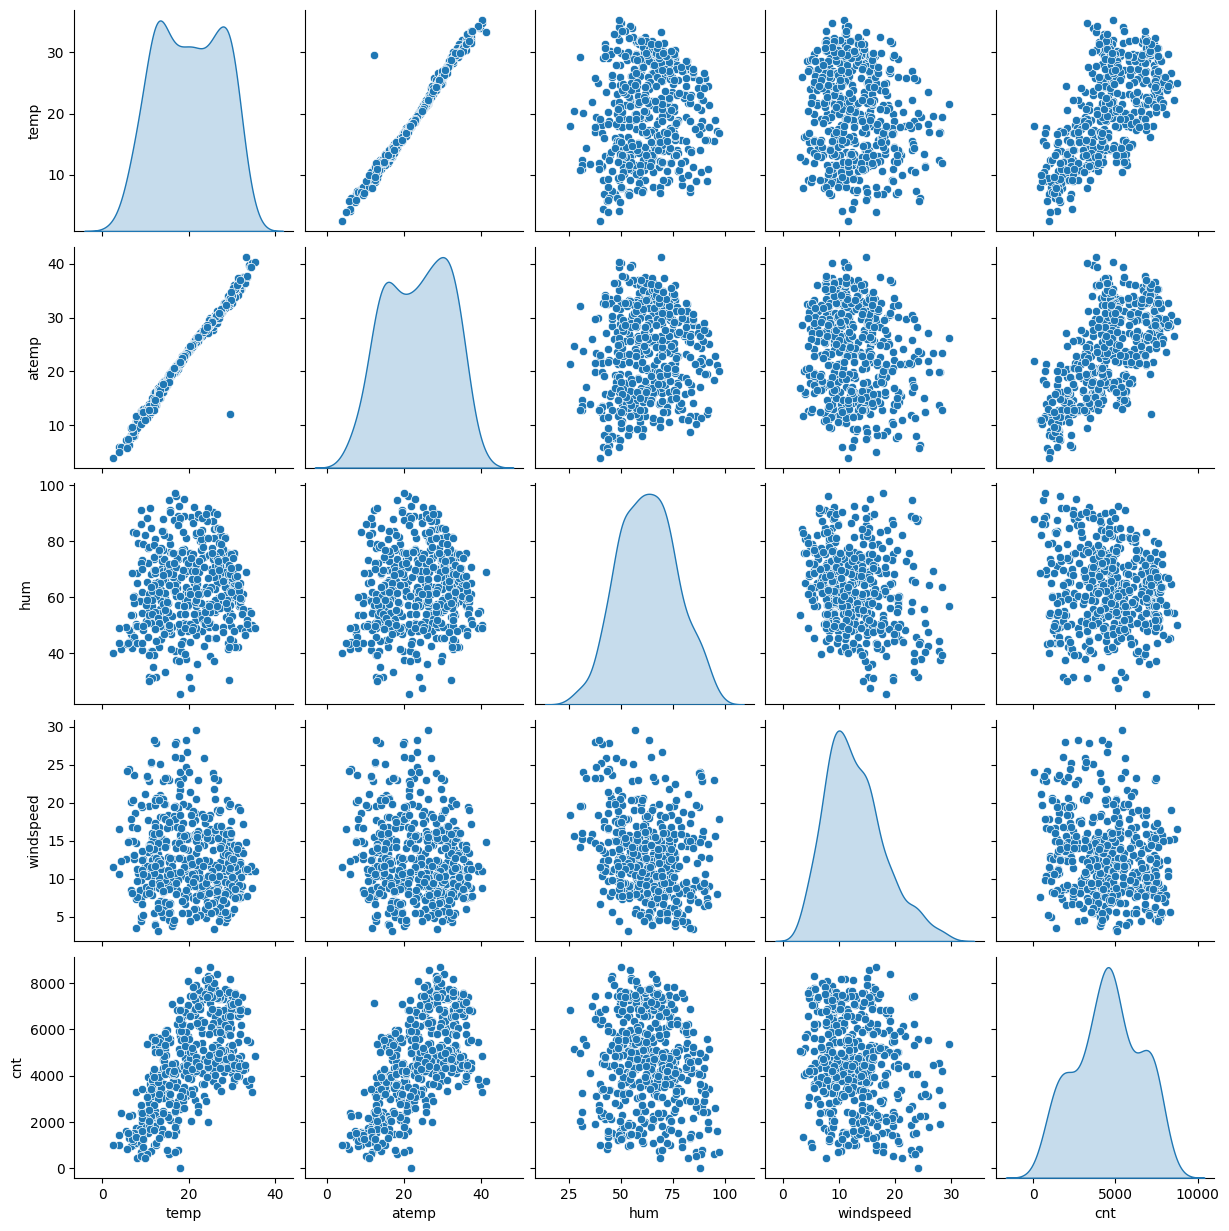

In [91]:
# kde plot to check the variability of dataset
sns.pairplot(df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']], diag_kind='kde')

In [92]:
df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(method='pearson')

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.989962,0.118304,-0.161249,0.644021
atemp,0.989962,1.000000,0.133340,-0.187145,0.645759
hum,0.118304,0.133340,1.000000,-0.244159,-0.112129
windspeed,-0.161249,-0.187145,-0.244159,1.000000,-0.226396
cnt,0.644021,0.645759,-0.112129,-0.226396,1.000000


In [93]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.029412,0.684314,20.133859,23.526083,62.732983,12.811782,4535.013725,0.24902,0.252941,...,0.076471,0.080392,0.149020,0.147059,0.139216,0.141176,0.145098,0.137255,0.027451,0.339216
std,0.500487,0.169124,0.465245,7.612400,8.286509,13.865555,5.167519,1970.099555,0.43287,0.435124,...,0.266010,0.272166,0.356457,0.354512,0.346511,0.348545,0.352545,0.344454,0.163554,0.473908
min,0.000000,0.000000,0.000000,2.424346,3.953480,25.416700,3.125550,22.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.495847,16.295363,52.239550,9.010445,3206.500000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.107097,23.878750,62.270850,11.958797,4581.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.837913,30.445775,72.291700,15.729372,6050.500000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,41.318550,97.041700,29.584721,8714.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


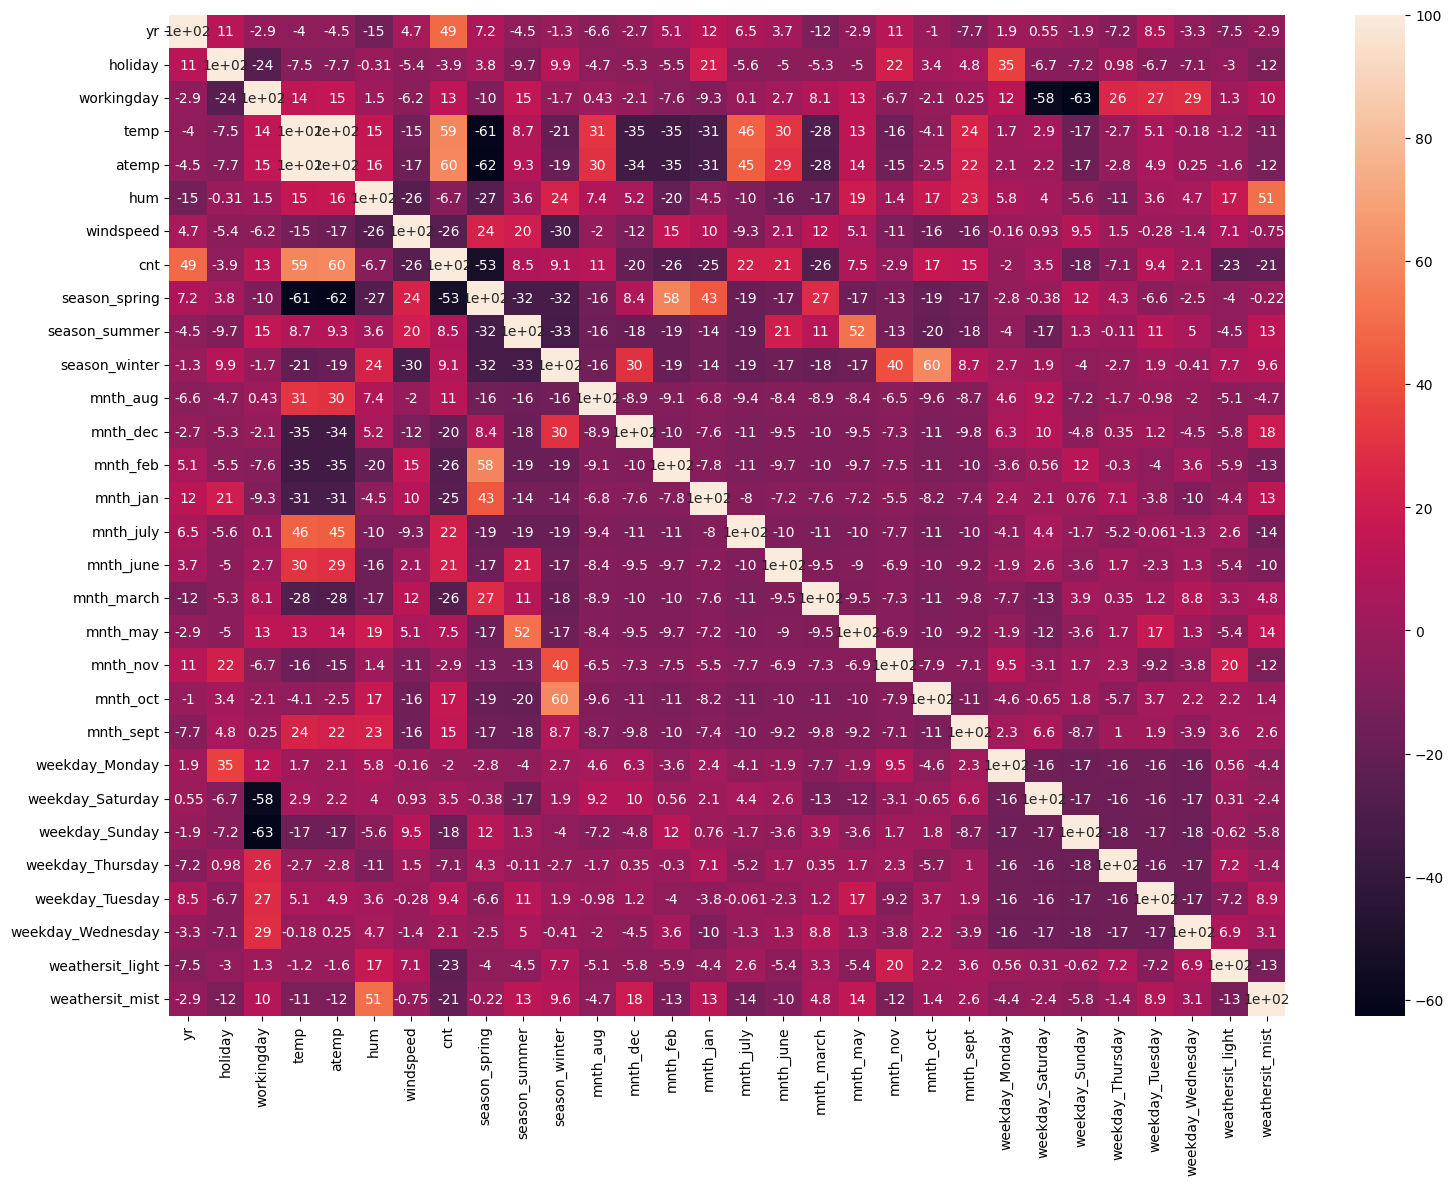

In [ ]:
plt.figure(figsize=(18, 13))  # Set the figure size (width, height)
sns.heatmap(df_test.corr(method='pearson') * 100, annot=True) # multiplied by 100 to get a score out of 100
plt.show()

- *correlation matrix* shows the correlation between each pair of variables, a dive in multicollinearity
- There is a need for *variance inflation factor (VIF)* & *p-value*, for identifying the correct variable to select/eliminate from the model

*Some observations* : temp & atemp are similar; they are moderately correlated to season 3 (almost same values present), can keep anyone of it 

# Normalizing Data

*To implement RFE, we need to prepare the data by scaling and normalizing it.*

In [95]:
# feature scaling imports
from sklearn.preprocessing import MinMaxScaler

In [96]:
# object of scaler function
scaler = MinMaxScaler()

In [97]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
63,0,0,0,15.750847,18.93895,78.9167,16.875357,2077,1,0,...,0,0,0,1,0,0,0,0,0,1
658,1,0,0,19.030847,22.82145,51.0000,11.125618,6824,0,0,...,1,0,0,0,1,0,0,0,0,0
585,1,0,1,30.989153,34.97540,62.0417,10.458700,7286,0,0,...,0,0,0,0,0,1,0,0,0,0
204,0,0,0,34.030000,39.74145,55.0833,11.334457,3606,0,0,...,0,0,0,0,1,0,0,0,0,0
46,0,0,1,13.048701,15.81000,42.3478,16.869997,2115,1,0,...,0,0,0,0,0,0,0,1,0,0


In [98]:
variables = ['temp','atemp','hum','windspeed','cnt']
df_train[variables] = scaler.fit_transform(df_train[variables])

In [99]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.029412,0.684314,0.538218,0.523821,0.520995,0.366082,0.519215,0.24902,0.252941,...,0.076471,0.080392,0.149020,0.147059,0.139216,0.141176,0.145098,0.137255,0.027451,0.339216
std,0.500487,0.169124,0.465245,0.231352,0.221772,0.193585,0.195302,0.226657,0.43287,0.435124,...,0.266010,0.272166,0.356457,0.354512,0.346511,0.348545,0.352545,0.344454,0.163554,0.473908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336479,0.330305,0.374490,0.222414,0.366371,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.537404,0.533259,0.514543,0.333844,0.524505,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741963,0.709012,0.654450,0.476350,0.693569,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
# splitting variables
# independent variables
X_train = df_train.drop(columns=['cnt'])
# dependent variables
y_train = df_train['cnt']

# Modelling

*Builing Linear Regression Model*

*Tackling Data Problems - **Multicollinearity**, the phenomenon of high correlation between predictor variables, can create instability and bias in regression models.*

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

*RFE- Recursive Feature Elimination*

https://www.analyticsvidhya.com/blog/2023/05/recursive-feature-elimination/

*Reasons to use RFE*

* Can handle interactions between features and is suitable for complex datasets.
* Can be used for both classification and regression tasks.
* Can handle high-dimensional data and is robust to overfitting.
* Can be used for feature selection and dimensionality reduction.
* May not be the best approach for datasets with many correlated features.

*What else can also be used?*
* PCA - RFE can handle multicollinearity but may not be the best approach. Other techniques, such as PCA and regularisation, can also deal with multicollinearity.
* Lasso - Lasso regression (L1 regularization) can also be used for feature selection and dimensionality reduction
* Ridge -  Ridge Regression (L2 regularization) can also help mitigate multicollinearity.

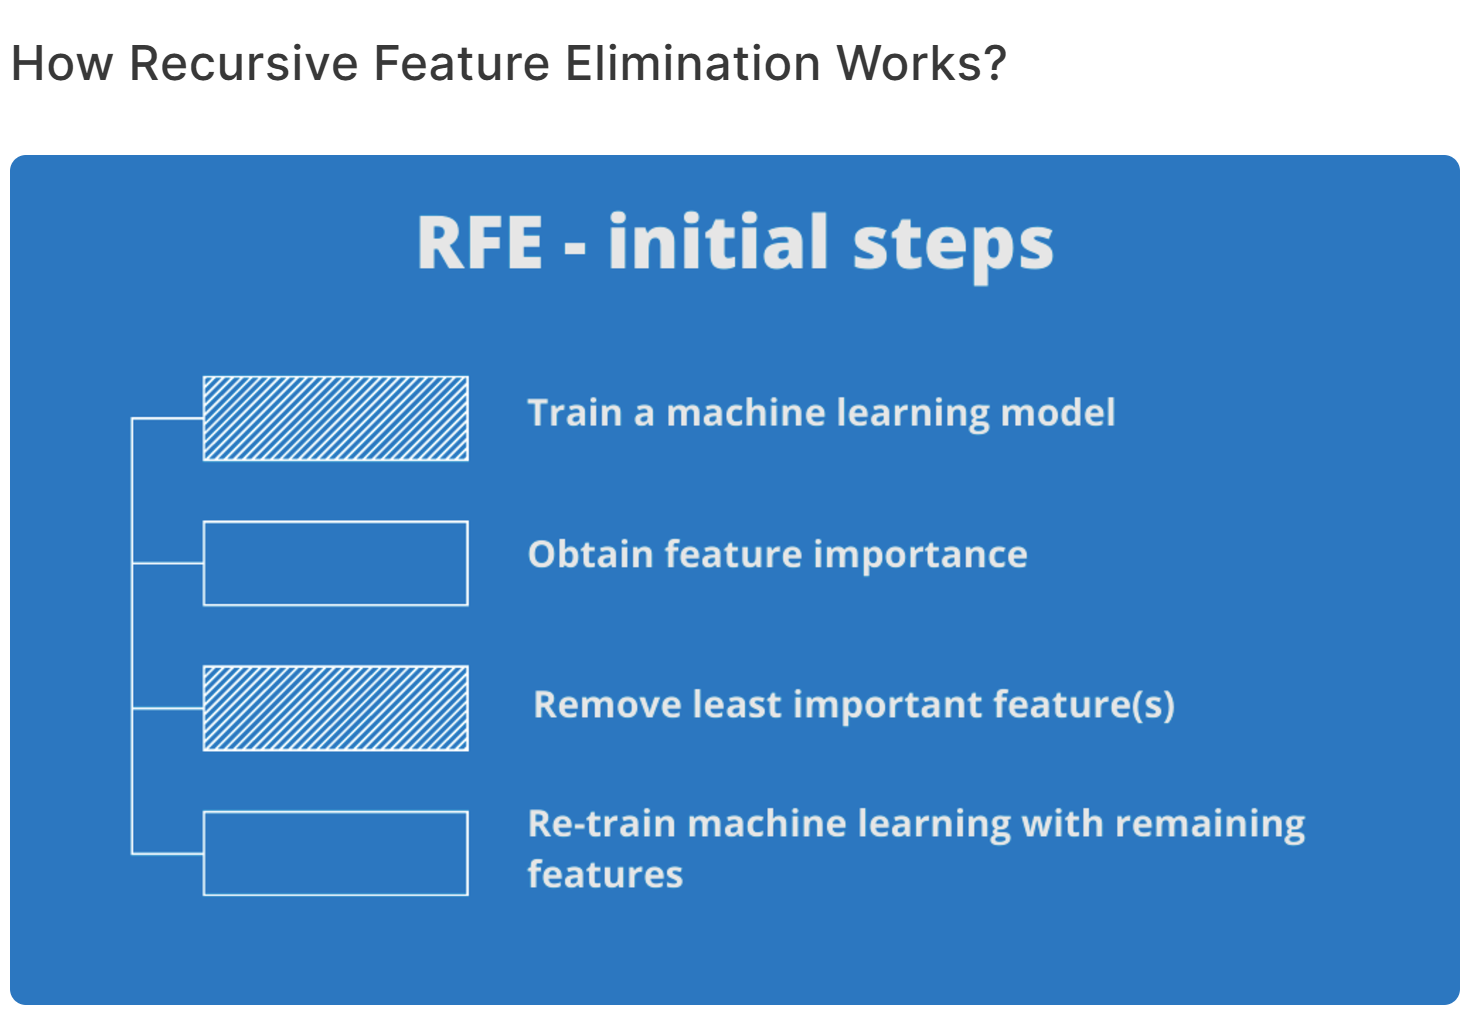


In [102]:
# Linear Regression Model & training
linear_regression = LinearRegression()

In [103]:
X_train.shape

(510, 29)

In [104]:
rfe = RFE(linear_regression, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [105]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [106]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True, False,  True, False,  True,  True, False, False, False,
        True, False])

In [107]:
selected_features = X_train.columns[rfe.support_]
print(selected_features)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov',
       'mnth_sept', 'weekday_Saturday', 'weekday_Sunday', 'weathersit_light'],
      dtype='object')


*VIF - Variance Inflation Factor*

https://medium.com/@satyarepala/tackling-multicollinearity-understanding-variance-inflation-factor-vif-and-mitigation-techniques-2521ebf024b6

VIF is a statistical measure that quantifies the degree of multicollinearity for each predictor variable in a regression model. 

When two or more predictor variables are highly correlated, VIF assesses how much the variance of an estimated regression coefficient is inflated due to this correlation. 

A high VIF indicates that the variable is redundant or strongly related to other predictors, leading to instability in the regression model.

Calculating VIF:

To calculate the VIF for a predictor variable, we perform the following steps:

1. Fit a separate linear regression model using the predictor variable in question as the dependent variable and all other predictor variables as independent variables.

2. Obtain the R-squared (R²) value from this regression model.

3. Calculate VIF as VIF = 1 / (1 — R²).

Interpreting VIF Values:

VIF < 5: The variable has low multicollinearity (no significant issue).

VIF between 5 and 10: The variable has moderate multicollinearity (requires further investigation).

VIF > 10: The variable has high multicollinearity (serious issue, consider mitigation techniques).

**Model 1**

Using the top 15 features

In [108]:
import statsmodels.api as sm

In [109]:
X_train_input = X_train[X_train.columns[rfe.support_]] # with only 15 selected columns
X_train_input_sm = sm.add_constant(X_train_input) # adding constant
lr = sm.OLS(y_train,X_train_input_sm) # OLS Model
lr_output = lr.fit() # fit
print(lr_output.summary()) # print the summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     208.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.90e-197
Time:                        20:13:55   Log-Likelihood:                 526.52
No. Observations:                 510   AIC:                            -1023.
Df Residuals:                     495   BIC:                            -959.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2677      0.021  

**VIF**

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

*variables are not leading to Dummy Variable Trap*

In [111]:
# Create a DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_input.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_input.values, i) for i in range(X_train_input.shape[1])]

print(vif_data)

             Feature        VIF
0                 yr   1.034090
1            holiday   2.372380
2         workingday  31.831581
3               temp   3.018326
4                hum   1.311205
5          windspeed   1.160181
6      season_spring   2.941657
7      season_winter   2.393095
8           mnth_dec   1.421760
9           mnth_jan   1.687185
10          mnth_nov   1.843800
11         mnth_sept   1.084382
12  weekday_Saturday   7.200011
13    weekday_Sunday   7.369161
14  weathersit_light   1.209643


*Understanding Outputs of Model-1*

* R-squared value: 0.85 , high value looks good
* p-value shows statistical significance under 0.05
* VIF value for workingday is 31.831581, highest

*Dump workingday in the next model*

**Model 2**

In [112]:
X_train_input = X_train_input.drop(columns=['workingday'])

In [113]:
X_train_input_sm = sm.add_constant(X_train_input) # adding constant
lr = sm.OLS(y_train,X_train_input_sm) # OLS Model
lr_output = lr.fit() # fit
print(lr_output.summary()) # print the summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     208.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.90e-197
Time:                        20:13:55   Log-Likelihood:                 526.52
No. Observations:                 510   AIC:                            -1023.
Df Residuals:                     495   BIC:                            -959.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3581      0.026  

In [114]:
# Create a DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_input.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_input.values, i) for i in range(X_train_input.shape[1])]

print(vif_data)

             Feature       VIF
0                 yr  2.034814
1            holiday  1.052615
2               temp  8.607051
3                hum  8.564462
4          windspeed  4.043366
5      season_spring  2.795512
6      season_winter  2.826016
7           mnth_dec  1.503880
8           mnth_jan  1.762869
9           mnth_nov  1.954878
10         mnth_sept  1.179179
11  weekday_Saturday  1.200131
12    weekday_Sunday  1.214605
13  weathersit_light  1.221940


*Understanding Outputs of Model-2*

* R-squared value: 0.85 , high value looks good
* p-value shows statistical significance but is higher for weekday_Saturday
* VIF value for temp is 8.607051, highest

*Dump weekday_Saturday in next Model-3*

**Model-3**

In [115]:
X_train_input = X_train_input.drop(columns=['weekday_Saturday'])

In [116]:
X_train_input_sm = sm.add_constant(X_train_input) # adding constant
lr = sm.OLS(y_train,X_train_input_sm) # OLS Model
lr_output = lr.fit() # fit
print(lr_output.summary()) # print the summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     224.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          3.08e-198
Time:                        20:13:55   Log-Likelihood:                 526.02
No. Observations:                 510   AIC:                            -1024.
Df Residuals:                     496   BIC:                            -964.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3620      0.026  

In [117]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_input.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_input.values,i) for i in range(X_train_input.shape[1])]
print(vif_data)

             Feature       VIF
0                 yr  2.034106
1            holiday  1.045517
2               temp  8.580718
3                hum  8.555782
4          windspeed  4.009863
5      season_spring  2.787982
6      season_winter  2.824352
7           mnth_dec  1.503736
8           mnth_jan  1.762845
9           mnth_nov  1.954786
10         mnth_sept  1.179128
11    weekday_Sunday  1.184426
12  weathersit_light  1.221908


*Dump temp in the Model-4*

**Model-4**

In [118]:
X_train_input = X_train_input.drop(columns=['temp'])

In [119]:
X_train_input_sm = sm.add_constant(X_train_input) # adding constant
lr = sm.OLS(y_train,X_train_input_sm) # OLS Model
lr_output = lr.fit() # fit
print(lr_output.summary()) # print the summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     164.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.00e-164
Time:                        20:13:55   Log-Likelihood:                 442.94
No. Observations:                 510   AIC:                            -859.9
Df Residuals:                     497   BIC:                            -804.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6309      0.020  

**Removing temp lead to a decrease in r-squared value. Adding temp back and removing hum as it has higher VIF**

**Model 5**

In [120]:
# adding temp back
X_train_input['temp'] = X_train['temp']

# deleting hum
X_train_input = X_train_input.drop(columns=['hum'])

In [121]:
X_train_input_sm = sm.add_constant(X_train_input) # adding constant
lr = sm.OLS(y_train,X_train_input_sm) # OLS Model
lr_output = lr.fit() # fit
print(lr_output.summary()) # print the summary of the model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.8
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.56e-185
Time:                        20:13:55   Log-Likelihood:                 492.52
No. Observations:                 510   AIC:                            -959.0
Df Residuals:                     497   BIC:                            -904.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2625      0.025  

In [122]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_input.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_input.values,i) for i in range(X_train_input.shape[1])]
print(vif_data)

             Feature       VIF
0                 yr  2.027199
1            holiday  1.045516
2          windspeed  3.992387
3      season_spring  2.416675
4      season_winter  2.593487
5           mnth_dec  1.458779
6           mnth_jan  1.736352
7           mnth_nov  1.939869
8          mnth_sept  1.154044
9     weekday_Sunday  1.181852
10  weathersit_light  1.089208
11              temp  3.714603


*Understanding Output*

* R-squared value: 0.834 , high value looks good
* p-value shows statistical significance under 0.05
* No VIF value above 5

*Proceed with prediction*

# Prediction

In [123]:
y_train_pred = lr_output.predict(X_train_input_sm)

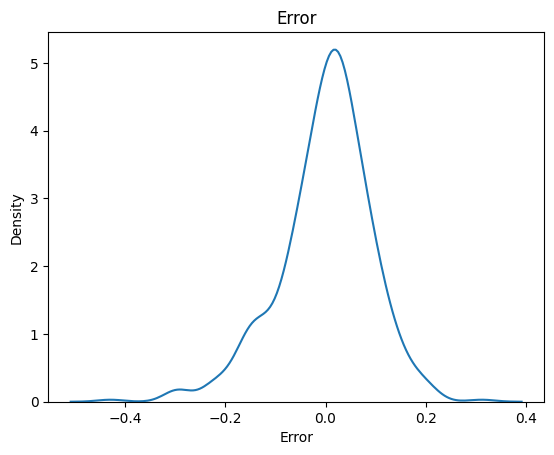

In [124]:
error = y_train - y_train_pred
sns.kdeplot(error)
plt.title('Error')                  
plt.xlabel('Error')  
plt.show()

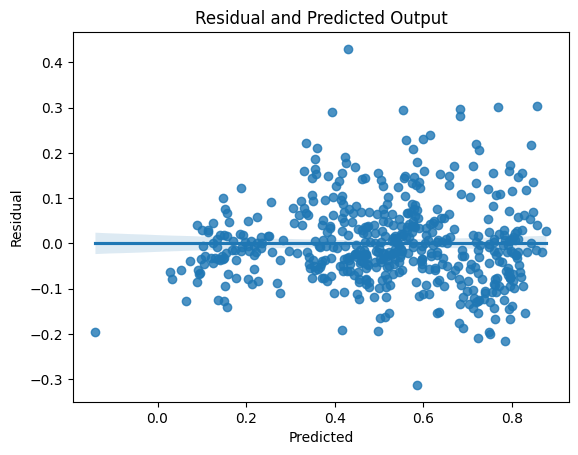

In [125]:
residual= y_train_pred - y_train 
sns.regplot(x= y_train_pred, y=residual)
plt.title("Residual and Predicted Output")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()

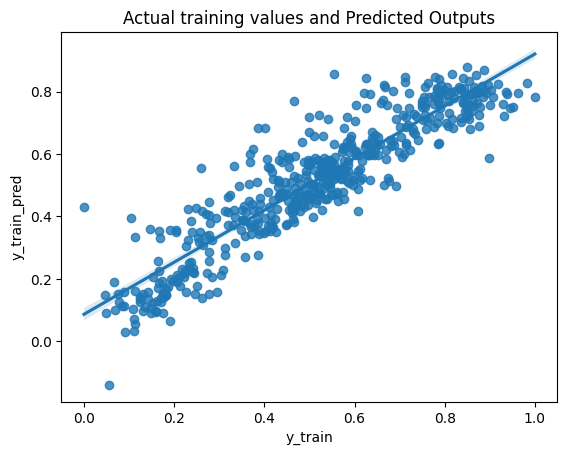

In [126]:
# actual training & predicted values
sns.regplot(x= y_train, y=y_train_pred)
plt.title("Actual training values and Predicted Outputs")
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.show()

# Predicting on testing dataset

In [127]:
variables=['temp','atemp','hum','windspeed','cnt']
# Normalizing test dataset
df_test[variables] = scaler.transform(df_test[variables])

In [128]:
y_test = df_test['cnt']
X_test = df_test.drop(columns=['cnt']) 

In [129]:
X_test = df_test[vif_data["Feature"]] 
X_test_sm = sm.add_constant(X_test) # adding constant

In [130]:
y_pred = lr_output.predict(X_test_sm) # predict using LR model

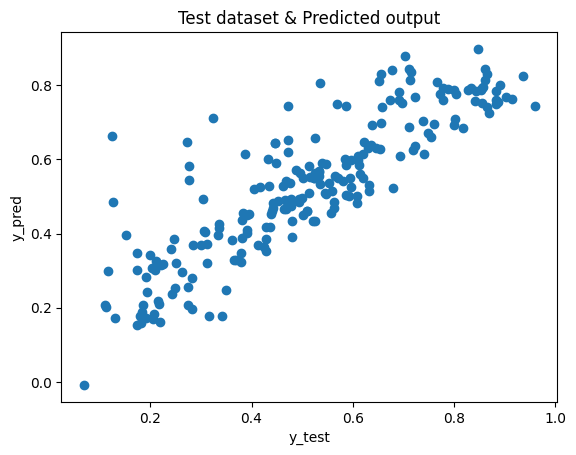

In [131]:
# scatter plot
plt.scatter(y_test, y_pred)
plt.title('Test dataset & Predicted output')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


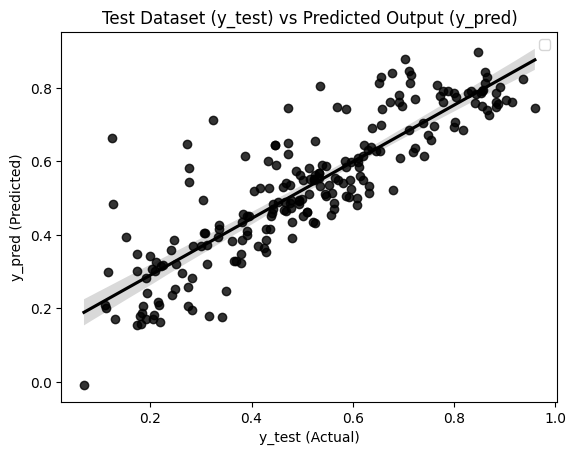

In [132]:
# plt with regression line
sns.regplot(x=y_test, y=y_pred, color='black')

plt.title('Test Dataset (y_test) vs Predicted Output (y_pred)')
plt.xlabel('y_test (Actual)')
plt.ylabel('y_pred (Predicted)')
plt.legend()
plt.show()

# Evaluation

In [133]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [134]:
print(lr_output.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.8
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.56e-185
Time:                        20:13:56   Log-Likelihood:                 492.52
No. Observations:                 510   AIC:                            -959.0
Df Residuals:                     497   BIC:                            -904.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2625      0.025  

In [135]:
print(np.round(r2_score(y_train, y_train_pred),2))

0.83


# Evaluation from the use case

In [136]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7383037284583783

In [137]:
print("Additional Regression Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_train_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_pred))

Additional Regression Metrics:
Mean Absolute Error (MAE): 0.06894911469915492
Mean Squared Error (MSE): 0.008485919961721612
